# 🧩 Credit Card Default — UCI
**Goal:** Identify key factors that influence credit card default risk.
**Dataset:** Default of Credit Card Clients Dataset.
**Tools:** Pandas, Seaborn, Matplotlib.
**Author:** Daniil Zuiev

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import os
from utilities.plotting import set_style, save_plot

os.makedirs('../output/graphs', exist_ok=True)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

set_style()
# %% Load Data
df = pd.read_csv('../data/credit_card.csv')

df.columns = df.columns.str.strip().str.lower().str.replace(".", '_')
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          30000 non-null  int64  
 1   limit_bal                   30000 non-null  float64
 2   sex                         30000 non-null  int64  
 3   education                   30000 non-null  int64  
 4   marriage                    30000 non-null  int64  
 5   age                         30000 non-null  int64  
 6   pay_0                       30000 non-null  int64  
 7   pay_2                       30000 non-null  int64  
 8   pay_3                       30000 non-null  int64  
 9   pay_4                       30000 non-null  int64  
 10  pay_5                       30000 non-null  int64  
 11  pay_6                       30000 non-null  int64  
 12  bill_amt1                   30000 non-null  float64
 13  bill_amt2                   300

## 🧼 Data Cleaning

We handle missing values in a way that preserves real-estate meaning:

- `id` → delete column as non-informational

This ensures:
- fields should be informational


In [59]:
df = df.drop(columns=['id'])
df['sex'].unique()
df['sex'].value_counts()
df['sex'] = df['sex'].astype('category')
df['education'] = df['education'].map({
    1:1,
    2:2,
    3:3,
    4:3,
    5:3,
    6:3,
    0:3
})
df['education'] = df['education'].astype('category')


df['marriage'].unique()
df['marriage'].value_counts()
df['marriage'] = df['marriage'].map({
    1:1,
    2:2,
    3:3,
    0:3
})
df['marriage'] = df['marriage'].astype('category')

df['marriage'].unique()

df['age'].isna().sum()

pay_col = [
    'pay_0','pay_2','pay_3','pay_4','pay_5','pay_6',
]
df[pay_col] = df[pay_col].astype(int)


for col in pay_col:
    if col in df.columns:
        print(f"\n=== {col} ===")
        print("Unique values:", df[col].unique())
        print(df[col].value_counts())

df[['bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5','bill_amt6']].isna().sum()
df[['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']].agg(['min', 'max'])
df[['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']].isna().sum()
df[['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']].agg(['min', 'max'])
bill_cols = [f'bill_amt{i}' for i in range(1,7)]
pay_amt_cols = [f'pay_amt{i}' for i in range(1,7)]

df[bill_cols + pay_amt_cols] = df[bill_cols + pay_amt_cols].astype(float)


df['default_payment_next_month'].unique()
df['default_payment_next_month'].value_counts()


=== pay_0 ===
Unique values: [ 2 -1  0 -2  1  3  4  8  7  5  6]
pay_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

=== pay_2 ===
Unique values: [ 2  0 -1 -2  3  5  7  4  1  6  8]
pay_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64

=== pay_3 ===
Unique values: [-1  0  2 -2  3  4  6  7  1  5  8]
pay_3
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64

=== pay_4 ===
Unique values: [-1  0 -2  2  3  4  5  7  6  1  8]
pay_4
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64

=== pay_5 ===
Unique values: [-2  0 -1  2  3  5  4  7  8  6]
pay_5
 0    16947
-1  

default_payment_next_month
0    23364
1     6636
Name: count, dtype: int64

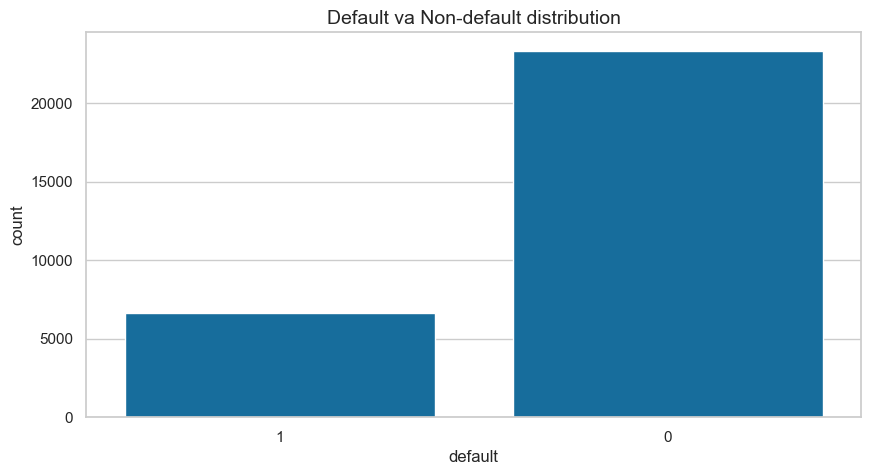

In [60]:
sns.countplot(x='default_payment_next_month', data=df, order=df['default_payment_next_month'])
plt.title('Default va Non-default distribution')
plt.xlabel('default')
plt.ylabel('count')
plt.savefig('../output/graphs/default_va_non_default.png')
plt.show()

**Default vs Non-default Distribution - Key Findings:**
The dataset is clearly imbalanced: most customers are non-defaulters, while only a smaller portion defaults.
A model trained on raw data will likely overpredict the majority class, giving artificially high accuracy.
This imbalance requires proper handling during ML modeling (class weights, oversampling, undersampling, or balanced metrics).
Default cases are rare but financially important, so focusing on identifying the minority class matters more than overall accuracy.
From a business perspective, the distribution confirms that early detection of risky customers is a key objective of a credit scoring model.

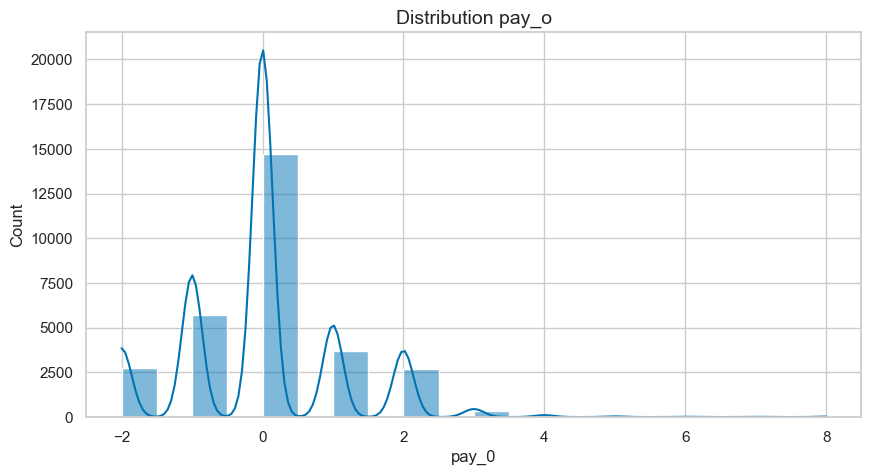

In [61]:
sns.histplot(df['pay_0'], bins=20, kde=True)
plt.title('Distribution pay_o')
plt.savefig('../output/graphs/distribution_pa_o.png')
plt.show()

**PAY_0 Distribution — Key Findings**:
Most customers are concentrated around 0, -1, and -2 — meaning payments are on time or early.
There is a visible spike at 0, which indicates the majority pay exactly on time (no delay).
Delays of 1–2 months exist but are much less common, forming smaller secondary peaks.
Severe delays (3+ months) are extremely rare — the right tail is almost empty.
The distribution is skewed toward non-delay behavior, meaning most customers historically pay responsibly.
This feature likely has strong predictive power: as delay increases, the risk of default tends to rise.

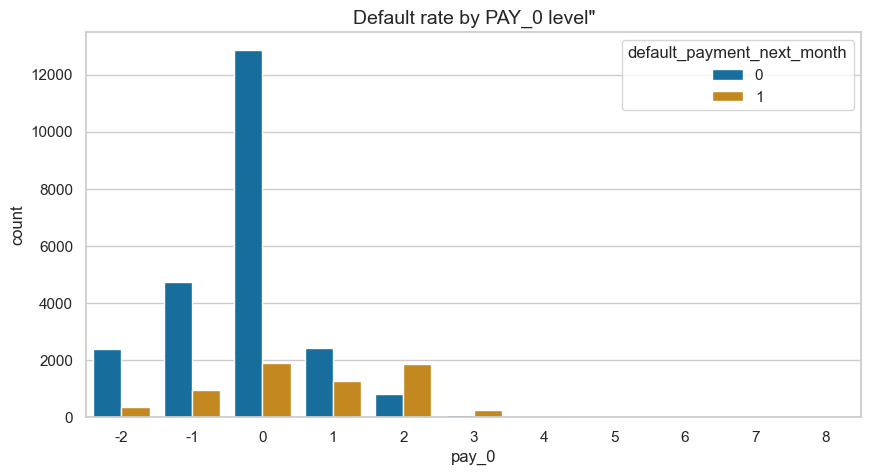

In [62]:
sns.countplot(x='pay_0', data=df, hue='default_payment_next_month')
plt.title('Default rate by PAY_0 level"')
plt.savefig('../output/graphs/default_payment_vs.png')
plt.show()

**Default Rate by PAY_0 — Key Findings:**
Customers with PAY_0 = -2, -1, 0 have very low default rates — almost all bars are blue (non-default).
As soon as PAY_0 becomes 1 month late, the yellow portion (defaults) starts noticeably increasing.
At PAY_0 = 2, the number of defaulters becomes similar to the number of non-defaulters — a strong warning signal.
For PAY_0 ≥ 3, the majority of cases are defaults, even though total samples are small — this indicates extremely high risk.
The visual trend is clear: each additional month of delay sharply increases the probability of default.
PAY_0 is therefore a high-impact predictor: recent payment behavior directly reflects future credit risk.

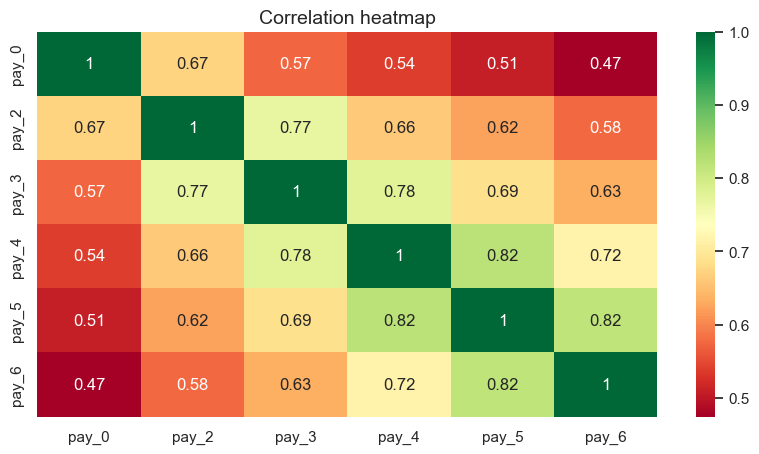

In [63]:
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
sns.heatmap(df[pay_cols].corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation heatmap')
plt.savefig('../output/graphs/correlation_heatmap.png')
plt.show()

**PAY_X Correlation Heatmap — Key Findings:** .
All PAY_* variables show strong positive correlations with each other (0.47–0.82).
Reason: past payment delays tend to repeat — a customer late in one month is likely late again in other months.
The highest correlations appear between adjacent months (PAY_3 ↔ PAY_4 ≈ 0.78, PAY_4 ↔ PAY_5 ≈ 0.82).
Correlation gradually weakens with distance (PAY_0 has the lowest correlation with PAY_6).
This pattern confirms that payment behavior is consistent over time, not random.
Important implication for ML: these features may be redundant and require:
dimensionality reduction (e.g., PCA),
or feature selection (keep only most recent delays).
Business interpretation: a customer with repeated delays historically is much more likely to default next month.  

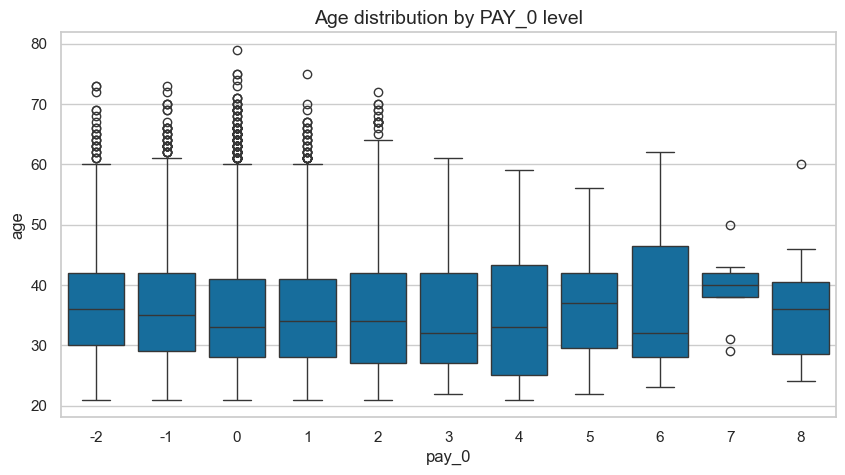

In [64]:
sns.boxplot(x='pay_0', y='age', data=df)
plt.title('Age distribution by PAY_0 level')
plt.savefig('../output/graphs/age_distribution.png')
plt.show()

**Age Distribution by PAY_0 — Key Findings** .
Age does not significantly change across PAY_0 categories — median age stays around 30–35 for all payment behaviors.
Customers with severe delays (PAY_0 >= 4) show slightly higher age variance, meaning both younger and older people appear among late payers.
Outliers (circles above boxes) indicate that older clients (60–75) exist in all categories — age alone is not a strong driver of payment discipline.
No visible trend that younger or older clients systematically miss payments more often.
Business implication:
Age is not a reliable feature for predicting default risk.
Important features remain the PAY_X history, not demographic age.  

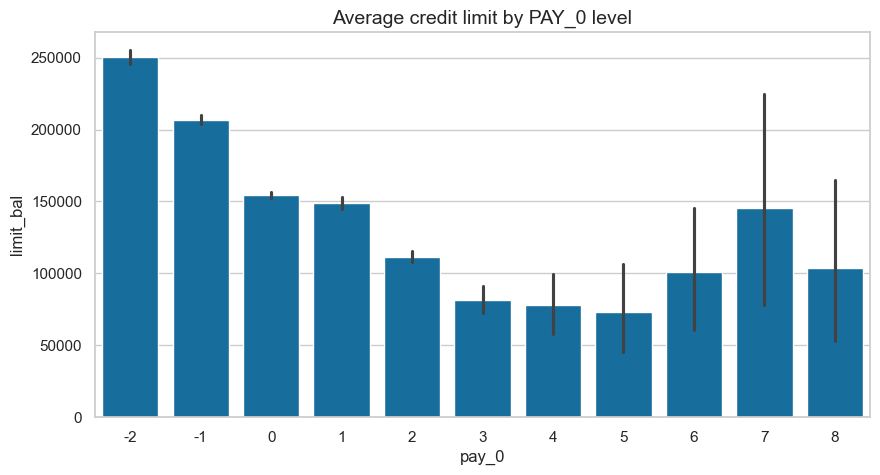

In [65]:
sns.barplot(y='limit_bal', x='pay_0', data=df, estimator=np.mean)
plt.title('Average credit limit by PAY_0 level')
plt.savefig('../output/graphs/credit_limit_distribution.png')
plt.show()

**Average Credit Limit by PAY_0 — Key Findings** .
Customers with no delay or early repayment (PAY_0 = -2, -1, 0) have the highest credit limits — meaning banks reward consistent payment behavior.
As soon as delays appear (PAY_0 = 1, 2, 3, 4, 5), the average credit limit decreases sharply, showing stricter credit assignment for riskier clients.
Very high PAY_0 values (6, 7, 8) show increased variance (tall error bars), meaning some late payers still have high limits — likely because:
they once had good history,
or banks misclassified risk,
or they recently worsened their payment behavior.
Overall trend: the worse the payment behavior → the lower the assigned limit, with exceptions only in very rare PAY_0 categories (low sample size).
Business implication:
Credit limit is a strong signal of risk level and historical reliability.
Credit scoring models will assign high importance to both PAY_0 and LIMIT_BAL.
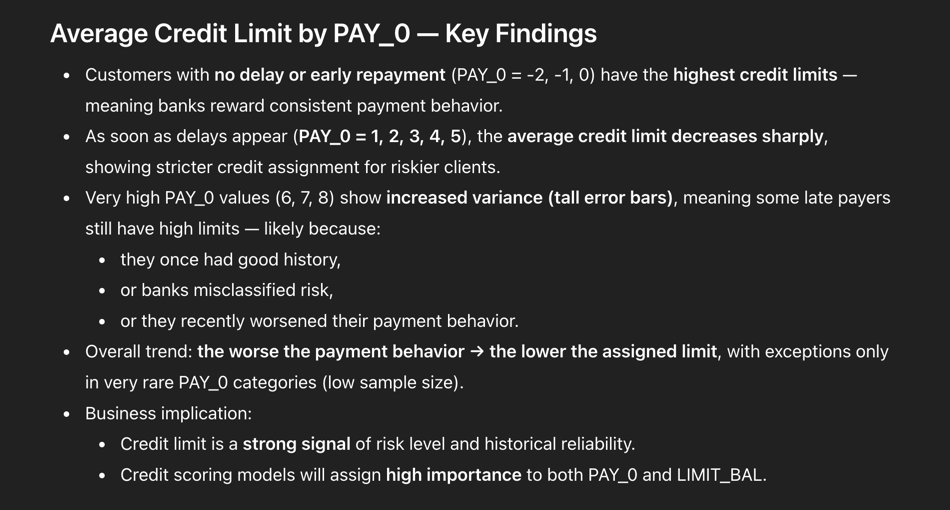

**📌 Final Summary & Business Insights** .
Defaults are rare (~22%), so the dataset is imbalanced. Any ML model will need class-balancing strategies.
PAY_X variables (PAY_0 → PAY_6) are the strongest signals of future default. Customers who recently delayed payments show sharply higher default rates.
PAY_0 is the single most useful feature — default risk rises dramatically from PAY_0 = 1 onward.
Credit limit (LIMIT_BAL) aligns strongly with risk: reliable payers have higher limits, while clients with delays have much lower limits.
Age has weak predictive value — repayment behavior matters more than demographics.
Demographic features (SEX, EDUCATION, MARRIAGE) show minimal relevance for default prediction.
Business takeaway .
Default risk is primarily driven by payment behavior + credit usage, not by demographic factors.
The best early-warning indicators are late payments and credit limit stress.